In [1]:
import pandas as pd
import numpy as np
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [2]:
corpus = pd.read_csv("./data/corpus.csv")
train = pd.read_csv('./data/train.csv')
test = pd.read_csv("./data/public_test.csv")

In [ ]:
train['cid'].value_counts().tolist()

In [20]:
import re
import re

def clean_text(text):
    # Loại bỏ các ký tự xuống dòng và thay thế bằng khoảng trắng
    text = re.sub(r'\n+', ' ', text)  # Thay thế nhiều ký tự xuống dòng bằng một khoảng trắng
    text = re.sub(r'[^\w\s.]', '', text)  # Giữ lại chữ cái, số, khoảng trắng và dấu chấm
    return text.strip()  # Loại bỏ khoảng trắng thừa ở đầu và cuối


clean_text(" Thien đang \n1... làm việc")

'Thien đang  1... làm việc'

In [28]:
train[train['cid'] =='[96199]']

,question,context,cid,qid
17016,Chi phí mua gói bảo hiểm cho người lao động có được tính vào thu nhập chịu thuế của người lao động đó hay không?,"['“đ.2) Khoản tiền do người sử dụng lao động mua bảo hiểm nhân thọ, bảo hiểm không bắt buộc khác có tích lũy về phí bảo hiểm; mua bảo hiểm hưu trí tự nguyện hoặc đóng góp Quỹ hưu trí tự nguyện cho người lao động.\nTrường hợp người sử dụng lao động mua cho người lao động sản phẩm bảo hiểm không bắt buộc và không có tích lũy về phí bảo hiểm (kể cả trường hợp mua bảo hiểm của các doanh nghiệp bảo hiểm không thành lập và hoạt động theo pháp luật Việt Nam được phép bán bảo hiểm tại Việt Nam) thì khoản tiền phí mua sản phẩm bảo hiểm này không tính vào thu nhập chịu thuế thu nhập cá nhân của người lao động. Bảo hiểm không bắt buộc và không có tích lũy về phí bảo hiểm gồm các sản phẩm bảo hiểm như: bảo hiểm sức khỏe, bảo hiểm tử kỳ (không bao gồm sản phẩm bảo hiểm tử kỳ có hoàn phí), ... mà người tham gia bảo hiểm không nhận được tiền phí tích lũy từ việc tham gia bảo hiểm, ngoài khoản tiền bảo hiểm hoặc bồi thường theo thỏa thuận tại hợp đồng bảo hiểm do doanh nghiệp bảo hiểm trả.”']",[96199],130633
64808,Nhân viên công ty có phải chịu thuế thu nhập cá nhân khi được công ty mua cho bảo hiểm sức khỏe hay không?,"['Các khoản thu nhập chịu thuế\n ...\n 2. Thu nhập từ tiền lương, tiền công\n ...\n đ) Các khoản lợi ích bằng tiền hoặc không bằng tiền ngoài tiền lương, tiền công do người sử dụng lao động trả mà người nộp thuế được hưởng dưới mọi hình thức:\n ...\n đ.2) Khoản tiền do người sử dụng lao động mua bảo hiểm nhân thọ, bảo hiểm không bắt buộc khác có tích lũy về phí bảo hiểm; mua bảo hiểm hưu trí tự nguyện hoặc đóng góp Quỹ hưu trí tự nguyện cho người lao động.\nTrường hợp người sử dụng lao động mua cho người lao động sản phẩm bảo hiểm không bắt buộc và không có tích lũy về phí bảo hiểm (kể cả trường hợp mua bảo hiểm của các doanh nghiệp bảo hiểm không thành lập và hoạt động theo pháp luật Việt Nam được phép bán bảo hiểm tại Việt Nam) thì khoản tiền phí mua sản phẩm bảo hiểm này không tính vào thu nhập chịu thuế thu nhập cá nhân của người lao động. Bảo hiểm không bắt buộc và không có tích lũy về phí bảo hiểm gồm các sản phẩm bảo hiểm như: bảo hiểm sức khoẻ, bảo hiểm tử kỳ (không bao gồm sản phẩm bảo hiểm tử kỳ có hoàn phí), ... mà người tham gia bảo hiểm không nhận được tiền phí tích lũy từ việc tham gia bảo hiểm, ngoài khoản tiền bảo hiểm hoặc bồi thường theo thoả thuận tại hợp đồng bảo hiểm do doanh nghiệp bảo hiểm trả.\n...']",[96199],45531
92385,"Thu nhập từ bảo hiểm nhân thọ do công ty mua có là thu nhập từ tiền lương, tiền công?","['""Điều 2. Các khoản thu nhập chịu thuế\nTheo quy định tại Điều 3 Luật Thuế thu nhập cá nhân và Điều 3 Nghị định số 65/2013/NĐ-CP, các khoản thu nhập chịu thuế thu nhập cá nhân bao gồm:\n....\n2. Thu nhập từ tiền lương, tiền công\nThu nhập từ tiền lương, tiền công là thu nhập người lao động nhận được từ người sử dụng lao động, bao gồm:\n....\nđ) Các khoản lợi ích bằng tiền hoặc không bằng tiền ngoài tiền lương, tiền công do người sử dụng lao động trả mà người nộp thuế được hưởng dưới mọi hình thức:\n...\nđ.2) Khoản tiền do người sử dụng lao động mua bảo hiểm nhân thọ, bảo hiểm không bắt buộc khác có tích lũy về phí bảo hiểm; mua bảo hiểm hưu trí tự nguyện hoặc đóng góp Quỹ hưu trí tự nguyện cho người lao động. \nTrường hợp người sử dụng lao động mua cho người lao động sản phẩm bảo hiểm không bắt buộc và không có tích lũy về phí bảo hiểm (kể cả trường hợp mua bảo hiểm của các doanh nghiệp bảo hiểm không thành lập và hoạt động theo pháp luật Việt Nam được phép bán bảo hiểm tại Việt Nam) thì khoản tiền phí mua sản phẩm bảo hiểm này không tính vào thu nhập chịu thuế thu nhập cá nhân của người lao động. Bảo hiểm không bắt buộc và không có tích lũy về phí bảo hiểm gồm các sản phẩm bảo hiểm như: bảo hiểm sức khoẻ, bảo hiểm tử kỳ (không bao gồm sản phẩm bảo hiểm tử kỳ có hoàn phí), ... mà người tham gia bảo hiểm không nhận được tiền phí tích lũy từ việc tham gia 

In [11]:
corpus[corpus['text'].str.contains('78/2014/TT-BTC', na=False)]

text  \
30734                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [26]:
def length(para):
    return len(para)
corpus['len'] = corpus['text'].apply(length)

In [50]:
len(corpus[corpus['len'] > 2048])/len(corpus)

0.14024243397286665

In [4]:
len(test)

10000

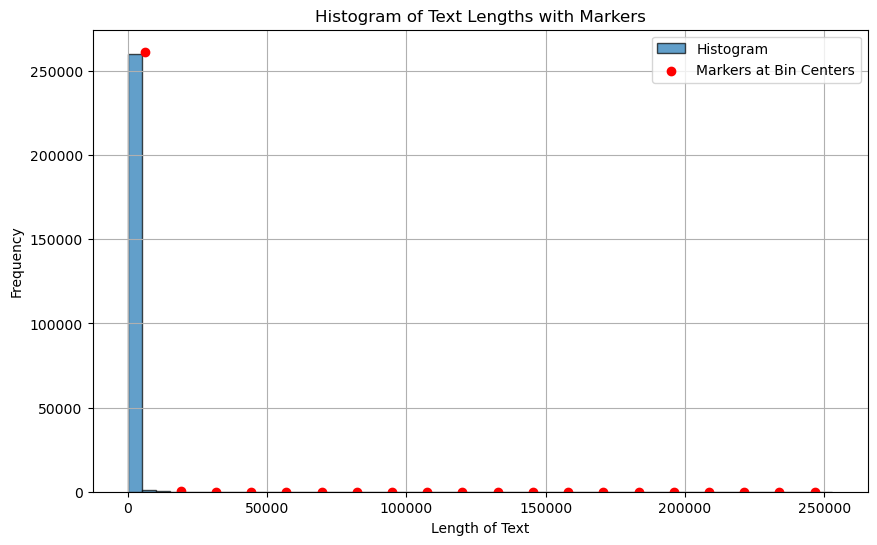

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Giả lập dữ liệu
np.random.seed(42)
lengths = np.array(corpus['len'])  # Giả lập dữ liệu cho corpus['len']

# Vẽ histogram với marker 'o'
counts, bins = np.histogram(lengths, bins=20)

# Tạo histogram
plt.figure(figsize=(10, 6))
plt.hist(lengths, bins=50, edgecolor='black', alpha=0.7, label='Histogram')

# Vẽ marker 'o' tại trung tâm của mỗi bin
bin_centers = 0.5 * (bins[:-1] + bins[1:])
plt.scatter(bin_centers, counts, color='red', marker='o', label='Markers at Bin Centers')

plt.xlabel('Length of Text')
plt.ylabel('Frequency')
plt.title('Histogram of Text Lengths with Markers')
plt.grid(True)
plt.legend()
plt.show()


In [19]:
train

,question,context,cid,qid
0,Người học ngành quản lý khai thác công trình thủy lợi trình độ cao đẳng phải có khả năng học tập và nâng cao trình độ như thế nào?,"['Khả năng học tập, nâng cao trình độ\n- Khối lượng kiến thức tối thiểu, yêu cầu về năng lực mà người học phải đạt được sau khi tốt nghiệp ngành, nghề quản lý, khai thác các công trình thủy lợi, trình độ cao đẳng có thể tiếp tục phát triển ở các trình độ cao hơn;\n- Người học sau tốt nghiệp có năng lực tự học, tự cập nhật những tiến bộ khoa học công nghệ trong phạm vi ngành, nghề để nâng cao trình độ hoặc học liên thông lên trình độ cao hơn trong cùng ngành, nghề hoặc trong nhóm ngành, nghề hoặc trong cùng lĩnh vực đào tạo./.']",[62492],161615
1,Nội dung lồng ghép vấn đề bình đẳng giới trong xây dựng văn bản quy phạm pháp luật được quy định thế nào?,"['Nội dung lồng ghép vấn đề bình đẳng giới trong xây dựng văn bản quy phạm pháp luật\nTrong phạm vi điều chỉnh của văn bản quy phạm pháp luật:\n1. Xác định nội dung liên quan đến vấn đề bình đẳng giới hoặc vấn đề bất bình đẳng giới, phân biệt đối xử về giới.\n2. Quy định các biện pháp cần thiết để thực hiện bình đẳng giới hoặc để giải quyết vấn đề bất bình đẳng giới, phân biệt đối xử về giới; dự báo tác động của các quy định đó đối với nam và nữ sau khi được ban hành.\n3. Xác định nguồn nhân lực, tài chính cần thiết để triển khai các biện pháp thực hiện bình đẳng giới hoặc để giải quyết vấn đề bất bình đẳng giới, phân biệt đối xử về giới.']",[151154],80037
2,"Sản phẩm phần mềm có được hưởng ưu đãi về thời gian miễn thuế, giảm thuế hay không? Nếu được thì trong vòng bao nhiêu năm?","['""Điều 20. Ưu đãi về thời gian miễn thuế, giảm thuế\n1. Miễn thuế bốn năm, giảm 50% số thuế phải nộp trong chín năm tiếp theo đối với:\na) Thu nhập của doanh nghiệp từ thực hiện dự án đầu tư quy định tại khoản 1 Điều 19 Thông tư số 78/2014/TT-BTC (được sửa đổi, bổ sung tại Khoản 1 Điều 11 Thông tư này)."" ']",[75071],124074
3,"Điều kiện để giáo viên trong cơ sở giáo dục mầm non, tiểu học ngoài công lập bị ảnh hưởng bởi Covid-19 được hưởng chính sách hỗ trợ là gì?","['Điều kiện được hưởng\nCán bộ quản lý, giáo viên, nhân viên được hưởng chính sách khi bảo đảm các điều kiện sau:\n1. Là người đang làm việc tại cơ sở giáo dục ngoài công lập trước khi cơ sở phải tạm dừng hoạt động theo yêu cầu của cơ quan nhà nước có thẩm quyền để phòng, chống dịch COVID-19 tính từ ngày 01 tháng 5 năm 2021 đến hết ngày 31 tháng 12 năm 2021.\n2. Nghỉ việc không hưởng lương từ 01 tháng trở lên tính từ ngày 01 tháng 5 năm 2021 đến hết ngày 31 tháng 12 năm 2021.\n3. Chưa được hưởng chính sách hỗ trợ đối với người lao động tạm hoãn hợp đồng lao động, nghỉ việc không hưởng lương theo quy định tại khoản 4, khoản 5, khoản 6 Mục II Nghị quyết số 68/NQ-CP ngày 01 tháng 7 năm 2021 của Chính phủ về một số chính sách hỗ trợ người lao động và người sử dụng lao động gặp khó khăn do đại dịch COVID-19, Nghị quyết số 126/NQ-CP ngày 08 tháng 10 năm 2021 của Chính phủ sửa đổi, bổ sung Nghị quyết số 68/NQ-CP ngày 01 tháng 7 năm 2021 của Chính phủ về một số chính sách hỗ trợ người lao động và người sử dụng lao động gặp khó khăn do đại dịch COVID-19 (sau đây gọi tắt là Nghị quyết số 68/NQ-CP) do không tham gia Bảo hiểm xã hội bắt buộc.\n4. Có xác nhận làm việc tại cơ sở giáo dục ngoài công lập ít nhất hết năm học 2021 - 2022 theo kế hoạch năm học của địa phương, bao gồm cơ sở giáo dục ngoài công lập đã làm việc trước đây hoặc cơ sở giáo dục ngoài công lập khác trong trường hợp cơ sở giáo dục ngoài công lập trước đây làm việc không hoạt động trở lại.']",[225897],146841
4,Nguyên tắc áp dụng phụ cấp ưu đãi nghề y tế thế nào?,"['Nguyên tắc áp dụng\n1. Trường hợp công chức, viên chức chuyên môn y tế thuộc đối tượng được hưởng các mức phụ cấp ưu đãi theo nghề khác nhau thì được hưởng một mức phụ cấp ưu đãi theo nghề cao nhất.\n2. Công chức, viên chức đã hưởng phụ cấp ưu đãi theo nghề quy định tại Thông tư liên tịch số 06/2010/TTLT-BYT-BNV-BTC ngày 22/3/2010 của Bộ Y tế, Bộ Nội vụ, Bộ Tài chính 